# Ejercicio 3


In [ ]:
!wget https://images.ctfassets.net/u4vv676b8z52/5E7p1SAbGcUN81LS7okVDb/0939688254e49f7d18d6048b0d9508ee/conditions_dry_eyes_faq_can_dry_eyes_cause_blurry_vision.jpg?fm=jpg&q=80

--2024-04-18 03:43:32--  https://images.ctfassets.net/u4vv676b8z52/5E7p1SAbGcUN81LS7okVDb/0939688254e49f7d18d6048b0d9508ee/conditions_dry_eyes_faq_can_dry_eyes_cause_blurry_vision.jpg?fm=jpg
Resolving images.ctfassets.net (images.ctfassets.net)... 18.66.255.19, 18.66.255.124, 18.66.255.21, ...
Connecting to images.ctfassets.net (images.ctfassets.net)|18.66.255.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77461 (76K) [image/jpeg]
Saving to: ‘conditions_dry_eyes_faq_can_dry_eyes_cause_blurry_vision.jpg?fm=jpg.1’

conditions_dry_eyes 100%[===================>]  75.65K  --.-KB/s    in 0.02s   

2024-04-18 03:43:32 (2.99 MB/s) - ‘conditions_dry_eyes_faq_can_dry_eyes_cause_blurry_vision.jpg?fm=jpg.1’ saved [77461/77461]



Librerias


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from google.colab.patches import cv2_imshow


Ploteo imagen

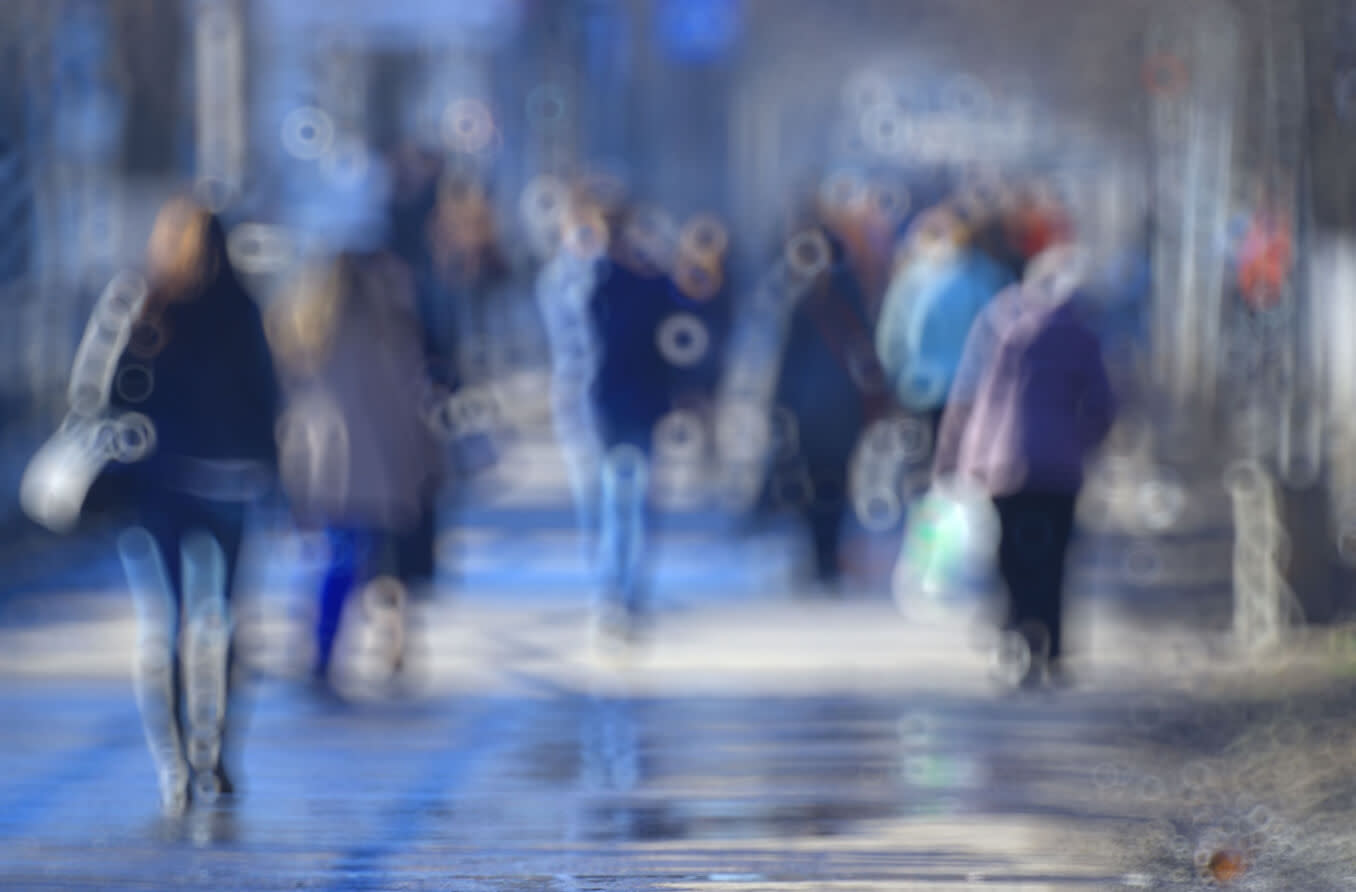

In [ ]:
imagen=cv2.imread("personas.jpg")
cv2_imshow(imagen)
plt.show()

Obtencion de pixeles


In [ ]:
pixel_values=imagen.reshape((-1,3))

datos=pd.DataFrame(pixel_values,columns=['Red','Green','Blue'])
pixel_values = np.float32(pixel_values)
pixel_red=datos["Red"]
pixel_green=datos["Green"]
pixel_blue=datos["Blue"]


Histograma de color

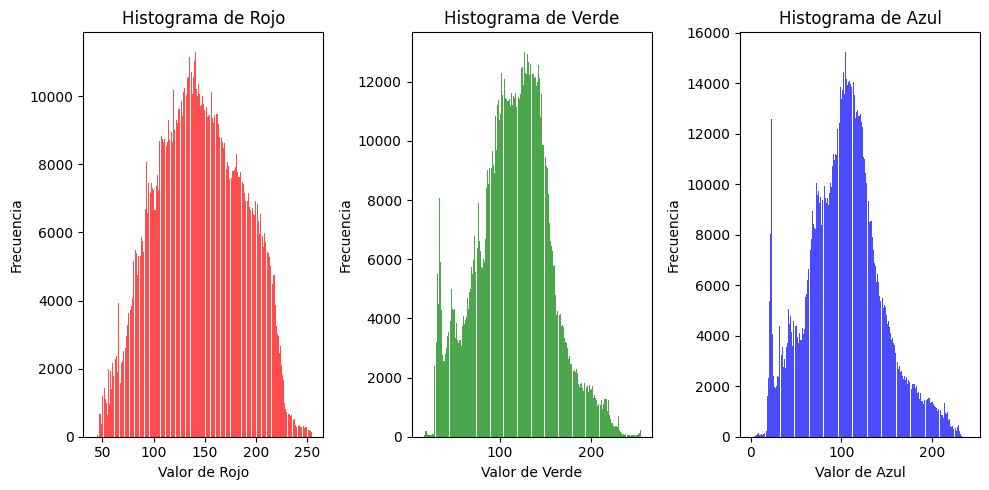

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.hist(pixel_red, bins=256, color='red', alpha=0.7)
plt.title('Histograma de Rojo')
plt.xlabel('Valor de Rojo')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.hist(pixel_green, bins=256, color='green', alpha=0.7)
plt.title('Histograma de Verde')
plt.xlabel('Valor de Verde')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
plt.hist(pixel_blue, bins=256, color='blue', alpha=0.7)
plt.title('Histograma de Azul')
plt.xlabel('Valor de Azul')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

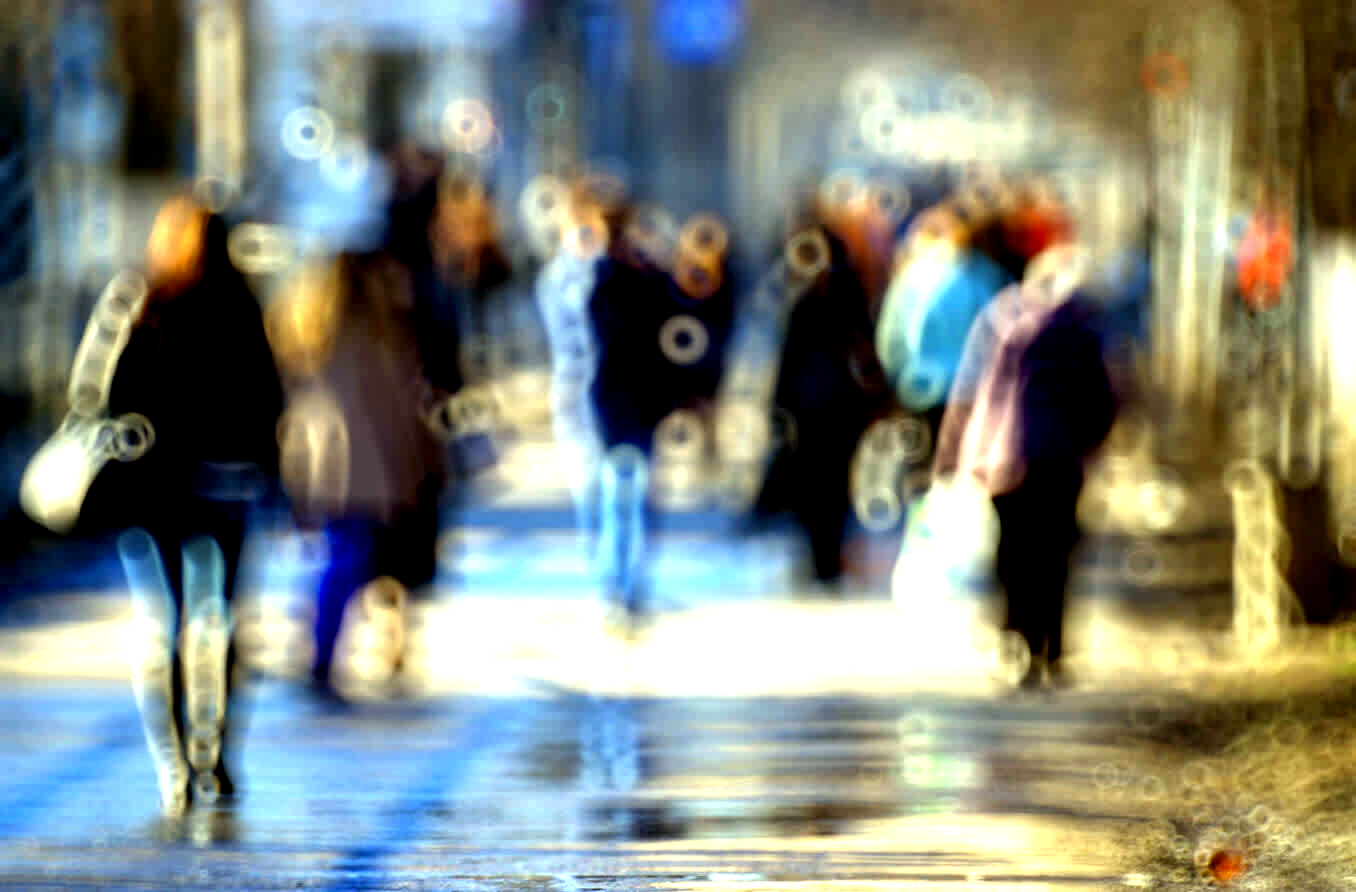

In [ ]:
# Calcular los percentiles 10 y 90 para cada canal de color por separado
percentil_10_por_canal = np.percentile(imagen, 5, axis=(0, 1))
percentil_90_por_canal = np.percentile(imagen, 95, axis=(0, 1))

# Recorrer toda la matriz de la imagen y aplicar la fórmula a cada valor de píxel
for i in range(imagen.shape[0]):
    for j in range(imagen.shape[1]):
        for k in range(imagen.shape[2]):
            v = imagen[i, j, k]
            m = percentil_10_por_canal[k]
            M = percentil_90_por_canal[k]
            # Aplicar la fórmula
            nuevo_valor = (v - m) * 255 / (M - m)
            # Limitar los valores para que estén dentro del rango [0, 255]
            if nuevo_valor < 0:
                nuevo_valor = 0
            elif nuevo_valor > 255:
                nuevo_valor = 255
            imagen[i, j, k] = nuevo_valor


cv2_imshow(imagen)
plt.show()

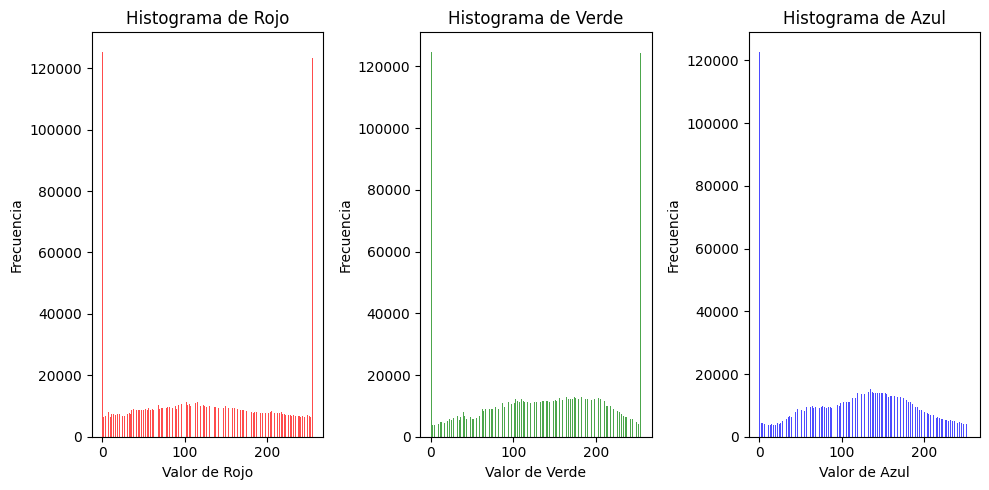

In [ ]:
pixel_values=imagen.reshape((-1,3))

datos=pd.DataFrame(pixel_values,columns=['Red','Green','Blue'])
pixel_values = np.float32(pixel_values)
pixel_red=datos["Red"]
pixel_green=datos["Green"]
pixel_blue=datos["Blue"]
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.hist(pixel_red, bins=256, color='red', alpha=0.7)
plt.title('Histograma de Rojo')
plt.xlabel('Valor de Rojo')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.hist(pixel_green, bins=256, color='green', alpha=0.7)
plt.title('Histograma de Verde')
plt.xlabel('Valor de Verde')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
plt.hist(pixel_blue, bins=256, color='blue', alpha=0.7)
plt.title('Histograma de Azul')
plt.xlabel('Valor de Azul')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
print(min_values_por_canal)

[0 0 0]
